In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

x = data.loc[:,data.columns!="Class"]
y = data.loc[:,data.columns=="Class"]

In [3]:
data['Class'].value_counts() #Imbalanced Class Problem

0    284315
1       492
Name: Class, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.2,stratify=ytrain,random_state=42)
std_scale = StandardScaler().fit(xtrain)
 
x_train_std = std_scale.transform(xtrain)
x_test_std = std_scale.transform(xtest)
x_val_std = std_scale.transform(xval)

oversample = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

x_train_over , y_train_over = oversample.fit_resample(x_train_std, ytrain)
x_val_over , y_val_over = oversample.fit_resample(x_val_std, yval)
x_test_over , y_test_over = oversample.fit_resample(x_test_std, ytest)

x_train_under , y_train_under = under.fit_resample(x_train_over, y_train_over)
x_val_under , y_val_under = under.fit_resample(x_val_over, y_val_over)
x_test_under , y_test_under = under.fit_resample(x_test_over, y_test_over)


features= data.drop('Class', axis = 1)
labels = np.array(data['Class'])
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
test_features = data

In [5]:
y_train_under.value_counts()

Class
0        121848
1         85294
dtype: int64

In [6]:
from sklearn import naive_bayes
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

class NB:
  def train_model(A,B):
    naive = GaussianNB()
    naive.fit(A, B)
    return naive

  def output_model(naive,P,Q):
    print(naive.score(P, Q))
    naive_matrix = confusion_matrix(Q,naive.predict(P))
    print(naive_matrix)
    return ' '

In [7]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

class LogReg:
  def train_model(A,B):
    logreg = LogisticRegression(solver='liblinear', random_state=0)
    logreg.fit(A, B)
    return logreg
  
  def output_model(logreg,P,Q):
    print(logreg.score(P, Q))
    logreg_matrix = confusion_matrix(Q,logreg.predict(P))
    print(logreg_matrix)
    return ' '

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

class SVM_Classifier:
  def train_model(A,B):
    clf = OneVsRestClassifier(LinearSVC(class_weight='balanced'))
    clf.fit(A, B)
    return clf

  def output_model(clf,P,Q):
    print(clf.score(P, Q))
    clf_matrix = confusion_matrix(Q,clf.predict(P))
    print(clf_matrix)
    return ' '

In [9]:
from sklearn.neighbors import KNeighborsClassifier

class KNN:
  def train_model(A,B):
    kmodel = KNeighborsClassifier(n_neighbors = 250)
    kmodel.fit(A, B)
    return kmodel
  
  def output_model(kmodel,P,Q):
    print(kmodel.score(P, Q))
    kmodel_train_matrix = confusion_matrix(Q,kmodel.predict(P))
    print(kmodel_train_matrix)
    return ' '

In [10]:
from sklearn.ensemble import RandomForestClassifier

class randomForest:
  def train_model(A,B):
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42, class_weight='balanced')
    rf.fit(A, B);
    return rf

  def output_model(rf,P,Q):
    print(rf.score(P, Q))
    rf_matrix = confusion_matrix(Q,rf.predict(P))
    print(rf_matrix)
    return ' '

In [11]:
from graphviz import Source
import xgboost as xgb

class XGB:
  def train_model(A,B):
    xgb_model = xgb.XGBClassifier(learning_rate=0.001, max_depth = 3, n_estimators = 100, scale_pos_weight=5)
    xgb_model.fit(A, B)

  def output_model(P,Q):
    print(xgb_model.score(P, Q))
    xgbmodel_train_matrix = confusion_matrix(Q,xgb_model.predict(P))
    print(xgbmodel_train_matrix)
    return ' ' 
  
  def print_XGBTree(P,Q):
    DM = xgb.DMatrix(P, label=Q)
    param = { 'eta': 0.3, 'max_depth': 3,  'objective': 'multi:softprob',  'num_class': 3 } 
    steps = 20
    
    XGB_Tree_model = xgb.train(param, DM, steps)
    xgb.plot_importance(XGB_Tree_model)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    
    xgb.plot_tree(XGB_Tree_model, num_trees=3)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    
    image = xgb.to_graphviz(XGB_Tree_model)
    image.graph_attr = {'dpi':'400'}
    image.render('XG Boost Tree', format = 'png')

In [12]:
def model_tester(model_class):
  model = model_class.train_model(x_train_under, y_train_under)
  print("Training Data Results for ",model_class," is:")
  print(model_class.output_model(model, x_train_under, y_train_under))
  print("Validation Data Results for ",model_class," is:")
  print(model_class.output_model(model, x_val_under, y_val_under))
  print("Testng Data Results for ",model_class," is:")
  print(model_class.output_model(model, x_test_under, y_test_under))

model_class = [NB, LogReg, SVM_Classifier, KNN, randomForest]
for V in model_class:
  model_tester(V)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Data Results for  <class '__main__.NB'>  is:
0.9272141815759237
[[119071   2777]
 [ 12300  72994]]
 
Validation Data Results for  <class '__main__.NB'>  is:
0.9140081878572532
[[29753   708]
 [ 3745 17578]]
 
Testng Data Results for  <class '__main__.NB'>  is:
0.9171117728162764
[[49596  1174]
 [ 5980 29559]]
 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Data Results for  <class '__main__.LogReg'>  is:
0.9595881086404495
[[119658   2190]
 [  6181  79113]]
 
Validation Data Results for  <class '__main__.LogReg'>  is:
0.9344392090220918
[[29873   588]
 [ 2807 18516]]
 
Testng Data Results for  <class '__main__.LogReg'>  is:
0.9358351967929185
[[49866   904]
 [ 4634 30905]]
 


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Training Data Results for  <class '__main__.SVM_Classifier'>  is:
0.9590329339293818
[[119034   2814]
 [  5672  79622]]
 
Validation Data Results for  <class '__main__.SVM_Classifier'>  is:
0.9316391163293681
[[29730   731]
 [ 2809 18514]]
 
Testng Data Results for  <class '__main__.SVM_Classifier'>  is:
0.934780845566511
[[49610  1160]
 [ 4469 31070]]
 
Training Data Results for  <class '__main__.KNN'>  is:


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.986347529713916
[[119072   2776]
 [    52  85242]]
 
Validation Data Results for  <class '__main__.KNN'>  is:
0.9284528039548895
[[29751   710]
 [ 2995 18328]]
 
Testng Data Results for  <class '__main__.KNN'>  is:
0.9429144121702255
[[49628  1142]
 [ 3785 31754]]
 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Data Results for  <class '__main__.randomForest'>  is:
1.0
[[121848      0]
 [     0  85294]]
 
Validation Data Results for  <class '__main__.randomForest'>  is:
0.9249768268190947
[[30456     5]
 [ 3880 17443]]
 
Testng Data Results for  <class '__main__.randomForest'>  is:
0.933830770835023
[[50757    13]
 [ 5698 29841]]
 


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.utils import np_utils
import itertools

In [14]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (x_train_under.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))          
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

es = EarlyStopping(monitor = "accuracy", patience = 4)
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

2022-10-18 08:18:44.935062: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
result = model.fit(x_train_under, y_train_under, validation_data = (x_val_under, y_val_under), callbacks = [es], epochs = 100)

2022-10-18 08:18:45.244879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
6474/6474 [==============================] - 30s 4ms/step - loss: 0.0505 - accuracy: 0.9826 - val_loss: 0.5035 - val_accuracy: 0.9311
Epoch 2/100
6474/6474 [==============================] - 27s 4ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.4076 - val_accuracy: 0.9299
Epoch 3/100
6474/6474 [==============================] - 27s 4ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.4067 - val_accuracy: 0.9297
Epoch 4/100
6474/6474 [==============================] - 28s 4ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.4742 - val_accuracy: 0.9258
Epoch 5/100
6474/6474 [==============================] - 27s 4ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.4902 - val_accuracy: 0.9298
Epoch 6/100
6474/6474 [==============================] - 27s 4ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.4415 - val_accuracy: 0.9309
Epoch 7/100
6474/6474 [==============================] - 27s 4ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.4430 -

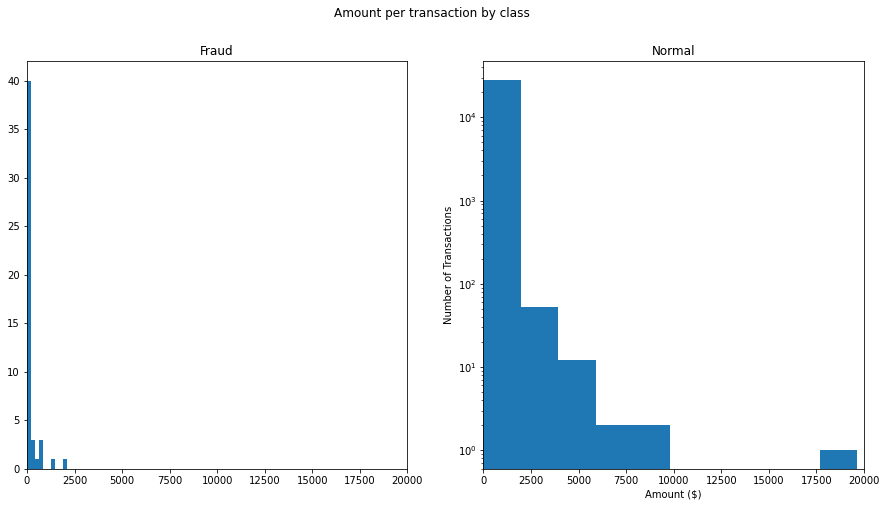

In [16]:
data1= data.sample(frac = 0.1,random_state=1)
Normal = data1[data1['Class']==0]
Fraud = data1[data1['Class']==1]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5), sharex=True)
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

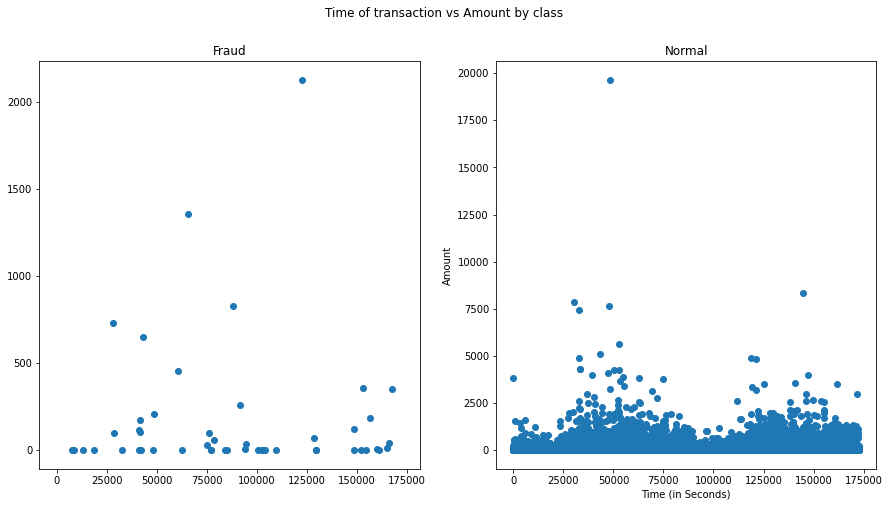

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5), sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

X = data1.loc[:,data1.columns!="Class"]
Y = data1.loc[:,data1.columns=="Class"]

Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)  
}

In [19]:
from sklearn.metrics import classification_report,accuracy_score
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    y_pred = y_pred.reshape(len(y_pred),1)
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: Class    73
dtype: int64
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: Class    97
dtype: int64
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: Class    8516
dtype: int64
Accuracy Score :
0.7009936448860644
Classification Report :
              precision  